In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import accuracy_score


# Task 1: Loading data

In [2]:
# Reading data
df=pd.read_csv('exams.csv')
df

,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   exam_1    100 non-null    float64
 1   exam_2    100 non-null    float64
 2   admitted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [4]:
df.describe()

,exam_1,exam_2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [5]:
df_new=df.copy()

In [6]:
# Scaling our data.
scaler=MinMaxScaler()
df_new[['exam_1', 'exam_2']] = scaler.fit_transform(df[['exam_1', 'exam_2']])


In [7]:
# Now, values are between 0 and 1
df_new

,exam_1,exam_2,admitted
0,0.065428,0.694655,0
1,0.003266,0.194705,0
2,0.082968,0.619618,0
3,0.431764,0.816001,1
4,0.701943,0.655392,1
...,...,...,...
95,0.765817,0.260407,1
96,0.174904,0.827651,1
97,0.992649,0.559166,1
98,0.362356,0.502865,1


# Task 2: Visualization

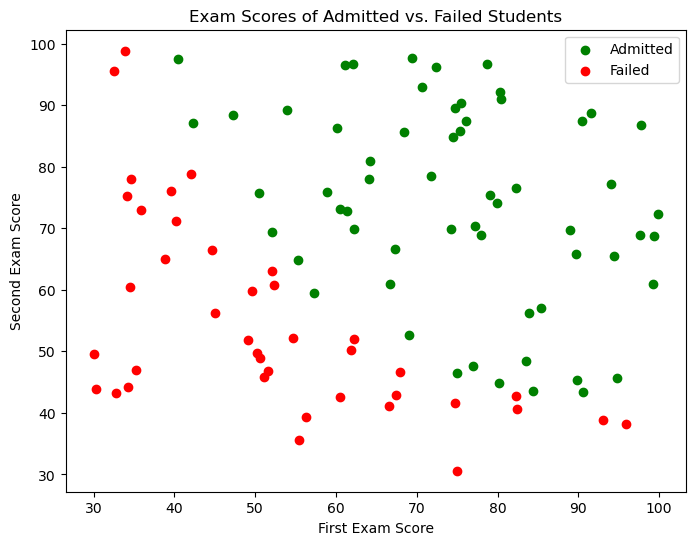

In [8]:
# Separating admitted and failed students
admitted_students = df[df['admitted'] == 1]
failed_students = df[df['admitted'] == 0]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(admitted_students['exam_1'], admitted_students['exam_2'], color='green', label='Admitted')
plt.scatter(failed_students['exam_1'], failed_students['exam_2'], color='red', label='Failed')

# Adding labels and title
plt.xlabel('First Exam Score')
plt.ylabel('Second Exam Score')
plt.title('Exam Scores of Admitted vs. Failed Students')
plt.legend()
plt.show()

# Task 3: Implementation of Logistic Regression from scratch

In [9]:
# Task 3: a
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [10]:
# Task 3: b
# Cost function for logistic regression
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    # Calculating cost using element-wise operations
    cost = (-1/m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    return cost


In [11]:
# Task 3: c
# Gradient descent for logistic regression
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        # Hypothesis calculation
        h = sigmoid(X.dot(theta))

        # Gradient calculation
        gradient = (1/m) * X.T.dot(h - y)
        
        # Updating theta simultaneously
        theta -= alpha * gradient

        # Saving cost for plotting
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
        # Printing cost every 10000 iterations
        if i % 10000 == 0:
            print(f"Iteration {i}, Cost: {cost}")
    print("Final cost: ",cost)

    return theta, cost_history


In [12]:
# Preparing data

X = df_new[['exam_1', 'exam_2']].values
y = df_new['admitted'].values

# Adding intercept term to X
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Initializing fitting parameters
theta = np.zeros(X.shape[1])

# Setting gradient descent parameters
alpha = 0.01  # Learning rate
num_iters = 100000 # Number of iterations

# Performing gradient descent
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iters)

# Printing theta values
print(f'Optimal theta values: {theta}')





Iteration 0, Cost: 0.6927369641087057
Iteration 10000, Cost: 0.37135834050346644
Iteration 20000, Cost: 0.3036901712305147
Iteration 30000, Cost: 0.2735343960873162
Iteration 40000, Cost: 0.2563280864947464
Iteration 50000, Cost: 0.2451727877821314
Iteration 60000, Cost: 0.2373585011915502
Iteration 70000, Cost: 0.23159386643681268
Iteration 80000, Cost: 0.22718108900987102
Iteration 90000, Cost: 0.2237082334738998
Final cost:  0.22091587123845663
Optimal theta values: [-8.18545745  9.34663335  8.76613616]


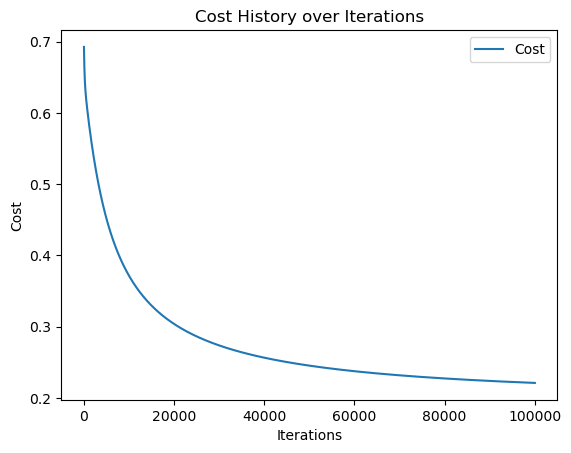

In [13]:
# Task 3: d
# Plotting cost history
plt.plot(range(num_iters), cost_history, label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History over Iterations')
plt.legend()
plt.show()


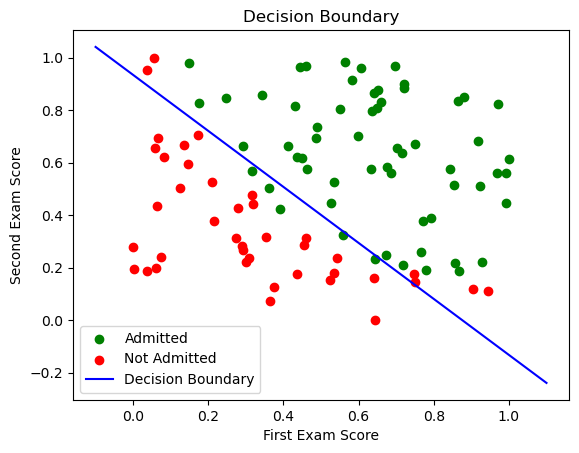

In [14]:
#Task 3: e

# Defining x_values, ensuring that boundary line covers the full range of exam scores
x_values = np.array([df_new['exam_1'].min() - 0.1, df_new['exam_1'].max() + 0.1])

# Calculating y_values using the theta parameters
y_values = -(theta[0] + theta[1] * x_values) / theta[2]

# Plotting data points
plt.scatter(df_new[df_new['admitted'] == 1]['exam_1'], df_new[df_new['admitted'] == 1]['exam_2'], 
            color='green', label='Admitted')
plt.scatter(df_new[df_new['admitted'] == 0]['exam_1'], df_new[df_new['admitted'] == 0]['exam_2'], 
            color='red', label='Not Admitted')

# Plotting decision boundary
plt.plot(x_values, y_values, color='blue', label='Decision Boundary')

# Setting labels, title, and legend
plt.xlabel('First Exam Score')
plt.ylabel('Second Exam Score')
plt.title('Decision Boundary')
plt.legend()
plt.show()


In [15]:
# Task 3: f
def predict(X, theta):
    return sigmoid(X @ theta) >= 0.5  # Predict 1 if probability >= 0.5, else 0

# Making predictions on training data
predictions = predict(X, theta)
# Comparing predictions with actual labels and calculate accuracy
accuracy = accuracy_score(y, predictions)

# Printing accuracy
print(f"Model accuracy on training data: {accuracy}")

# Adding unseen data to check model predictions on these data
# Adding intercept term
unseen_data = np.array([
    [1, 55, 70],  
    [1, 40, 60]
])
new_prediction = predict(unseen_data, theta)

# Printing results
print("Prediction for {55, 70, 1} (actual: 1):", "Predicted:", int(new_prediction[0]))
print("Prediction for {40, 60, 0} (actual: 0):", "Predicted:", int(new_prediction[1]))

Model accuracy on training data: 0.89
Prediction for {55, 70, 1} (actual: 1): Predicted: 1
Prediction for {40, 60, 0} (actual: 0): Predicted: 1


# Task 4: Logistic Regression using library

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Intializing features
X_ = df_new[['exam_1', 'exam_2']].values
y_ = df_new['admitted'].values

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_, y_)

# Make predictions on the training data
y_pred = model.predict(X_)

# Calculate the accuracy
accuracy_ = accuracy_score(y_, y_pred)
print(f"Model accuracy on training data: {accuracy * 100:.2f}%")

# Check model's predictions on specific cases
new_data_lr = np.array([[55, 70], [40, 60]])
new_y_pred = model.predict(new_data_lr)

# Display results
print("Prediction for {55, 70} (actual 1):", "Predicted:", new_y_pred[0])
print("Prediction for {40, 60} (actual 0):", "Predicted:", new_y_pred[1])


Model accuracy on training data: 89.00%
Prediction for {55, 70} (actual 1): Predicted: 1
Prediction for {40, 60} (actual 0): Predicted: 1
